In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.7 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import mne

In [3]:
from google.colab import drive
drive.mount('/content/drive/')


path='/content/drive/MyDrive/Data/sub-01_task-RDR_run-10_meg.fif'



Mounted at /content/drive/


In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    path)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 268GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /content/drive/MyDrive/Data/sub-01_task-RDR_run-10_meg.fif...
    Range : 21845 ... 261845 =     21.845 ...   261.845 secs
Ready.


In [ ]:
print(raw)
print(raw.info)

<Raw | sub-01_task-RDR_run-10_meg.fif, 328 x 240001 (240.0 s), ~5.2 MB, data not loaded>
<Info | 24 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: BIO001, IASX+, IASX-, IASY+, IASY-, IASZ+, IASZ-, IAS_DX, ...
 chs: 1 BIO, 11 IAS, 102 Magnetometers, 204 Gradiometers, 9 Stimulus, 1 SYST
 custom_ref_applied: False
 description: TRIUX system at PKU Meg Lab
 dev_head_t: MEG device -> head transform
 dig: 155 items (3 Cardinal, 4 HPI, 148 Extra)
 events: 1 item (list)
 experimenter: pkumeg
 file_id: 4 items (dict)
 gantry_angle: 60.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 60.0
 lowpass: 330.0 Hz
 meas_date: 2021-03-18 08:11:29 UTC
 meas_id: 4 items (dict)
 nchan: 328
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: wangshaonan
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 8 items (dict)
>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Using matplotlib as 2D backend.


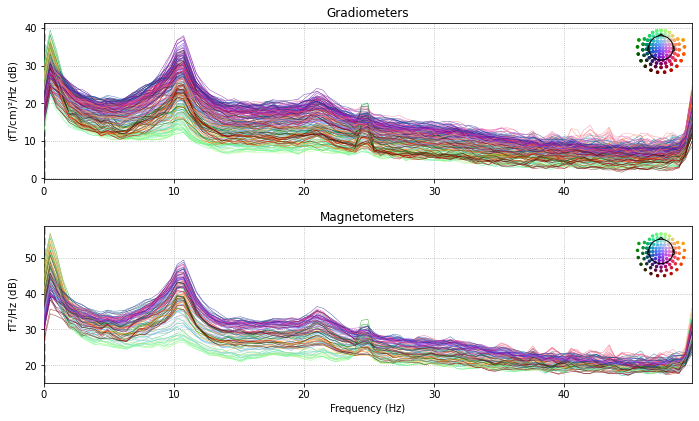

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


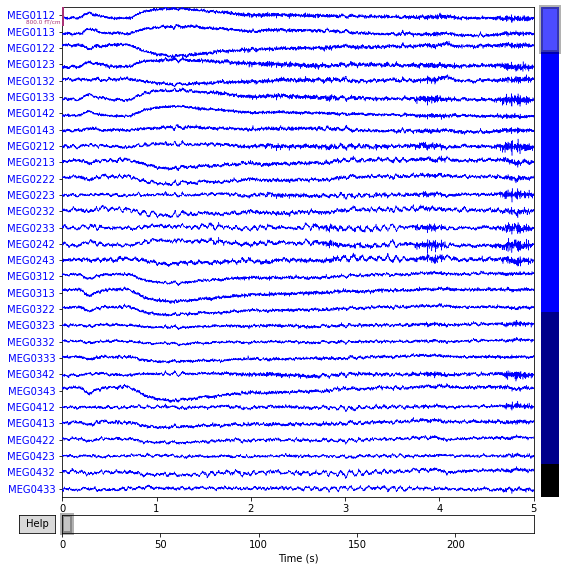

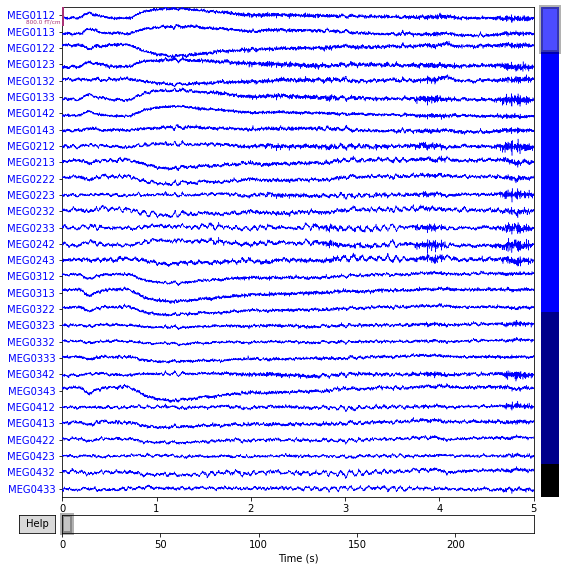

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 76.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


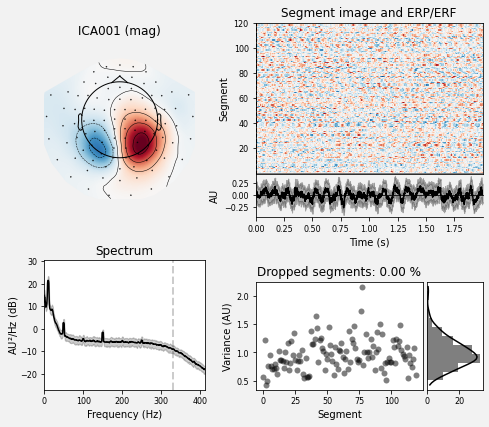

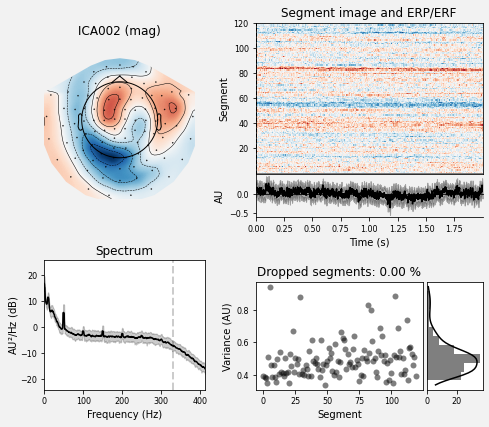

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
#preprocessing
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [4]:
####Loading continuous data

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    path)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 810GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /content/drive/MyDrive/Data/sub-01_task-RDR_run-10_meg.fif...
    Range : 21845 ... 261845 =     21.845 ...   261.845 secs
Ready.


In [5]:
print(raw)

<Raw | sub-01_task-RDR_run-10_meg.fif, 328 x 240001 (240.0 s), ~5.2 MB, data not loaded>


In [6]:
raw.crop(tmax=60)

<Raw | sub-01_task-RDR_run-10_meg.fif, 328 x 60001 (60.0 s), ~5.2 MB, data not loaded>

In [7]:
#Querying the Raw object

n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

print(raw.info)

the (cropped) sample data object has 60001 time samples and 328 channels.
The last time sample is at 60.0 seconds.
The first few channel names are BIO001, IASX+, IASX-.

bad channels: []
1000.0 Hz
TRIUX system at PKU Meg Lab 

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: BIO001, IASX+, IASX-, IASY+, IASY-, IASZ+, IASZ-, IAS_DX, ...
 chs: 1 BIO, 11 IAS, 102 Magnetometers, 204 Gradiometers, 9 Stimulus, 1 SYST
 custom_ref_applied: False
 description: TRIUX system at PKU Meg Lab
 dev_head_t: MEG device -> head transform
 dig: 155 items (3 Cardinal, 4 HPI, 148 Extra)
 events: 1 item (list)
 experimenter: pkumeg
 file_id: 4 items (dict)
 gantry_angle: 60.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 60.0
 lowpass: 330.0 Hz
 meas_date: 2021-03-18 08:11:29 UTC
 meas_id: 4 items (dict)
 nchan: 328
 proc_history: 2 items (list)
 proj_id: 1 item (